****Coursework 1****

Install Libraries

In [2]:
#pip install sklearn

In [3]:
#pip install seaborn

In [4]:
#pip install numpy

In [5]:
#pip install pandas

In [6]:
#pip install matplotlib

In [7]:
#pip install opencv-python

In [8]:
#pip install opencv-contrib-python

In [9]:
#pip install opencv-python-headless

In [10]:
#pip install opencv-contrib-python-headless

In [11]:
#pip install scikit-learn

In [12]:
#pip install scipy

Importing Required Libraries for the Coursework

In [13]:
import sys
assert sys.version_info >= (3,5)

In [14]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [15]:
import pandas as pd

In [16]:
import numpy as np

In [17]:
import scipy.stats as stats

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from pandas.plotting import scatter_matrix

In [20]:
import time

In [21]:
import cv2

In [22]:
import seaborn as sns

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB 

In [28]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
from itertools import cycle

Importing all required tables

In [31]:
binary_class_x_train=pd.read_csv('./Traffic_Sign/Binary_Classification/x_train_bin.csv')
binary_class_y_train=pd.read_csv('./Traffic_Sign/Binary_Classification/y_train_bin.csv')
binary_class_x_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')
binary_class_y_test=pd.read_csv('./Traffic_Sign/Binary_Classification/y_test_bin.csv')

complete_x_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_train_all.csv')
complete_y_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_train_all.csv')
complete_x_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv')
complete_y_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_test_all.csv')

onevsall_y_train_0=pd.read_csv('./Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv')
onevsall_y_train_1=pd.read_csv('./Traffic_Sign/OnevrsAll/1_vrs_all/y_train_1.csv')
onevsall_y_train_2=pd.read_csv('./Traffic_Sign/OnevrsAll/2_vrs_all/y_train_2.csv')
onevsall_y_train_3=pd.read_csv('./Traffic_Sign/OnevrsAll/3_vrs_all/y_train_3.csv')
onevsall_y_train_4=pd.read_csv('./Traffic_Sign/OnevrsAll/4_vrs_all/y_train_4.csv')
onevsall_y_train_5=pd.read_csv('./Traffic_Sign/OnevrsAll/5_vrs_all/y_train_5.csv')
onevsall_y_train_6=pd.read_csv('./Traffic_Sign/OnevrsAll/6_vrs_all/y_train_6.csv')
onevsall_y_train_7=pd.read_csv('./Traffic_Sign/OnevrsAll/7_vrs_all/y_train_7.csv')
onevsall_y_train_8=pd.read_csv('./Traffic_Sign/OnevrsAll/8_vrs_all/y_train_8.csv')
onevsall_y_train_9=pd.read_csv('./Traffic_Sign/OnevrsAll/9_vrs_all/y_train_9.csv')

def inverse_num(i):
    if i == 1: return 0
    else: return 1

onevsall_y_train_0 = [[inverse_num(i)] for i in onevsall_y_train_0.copy().to_numpy()]
onevsall_y_train_1 = [[inverse_num(i)] for i in onevsall_y_train_1.copy().to_numpy()]
onevsall_y_train_2 = [[inverse_num(i)] for i in onevsall_y_train_2.copy().to_numpy()]
onevsall_y_train_3 = [[inverse_num(i)] for i in onevsall_y_train_3.copy().to_numpy()]
onevsall_y_train_4 = [[inverse_num(i)] for i in onevsall_y_train_4.copy().to_numpy()]
onevsall_y_train_5 = [[inverse_num(i)] for i in onevsall_y_train_5.copy().to_numpy()]
onevsall_y_train_6 = [[inverse_num(i)] for i in onevsall_y_train_6.copy().to_numpy()]
onevsall_y_train_7 = [[inverse_num(i)] for i in onevsall_y_train_7.copy().to_numpy()]
onevsall_y_train_8 = [[inverse_num(i)] for i in onevsall_y_train_8.copy().to_numpy()]
onevsall_y_train_9 = [[inverse_num(i)] for i in onevsall_y_train_9.copy().to_numpy()]

Description of the datasets used

In [32]:
complete_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [33]:
complete_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [34]:
complete_x_train.shape

(9690, 2304)

In [35]:
complete_y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [36]:
complete_y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [37]:
complete_x_train.shape

(9690, 2304)

In [38]:
complete_x_train.isnull().values.any()

False

In [39]:
complete_y_train.isnull().values.any()

False

In [40]:
complete_x_test.isnull().values.any()

False

In [41]:
complete_y_test.isnull().values.any()

False

In [42]:
complete_x_train.duplicated().any()

False

In [43]:
complete_x_test.duplicated().any()

False

Visualisation of Images of different classes

In [44]:
def visualize_image(num):
    plt.imshow(complete_x_train.iloc[num].to_numpy().reshape(48,48),cmap="grey")

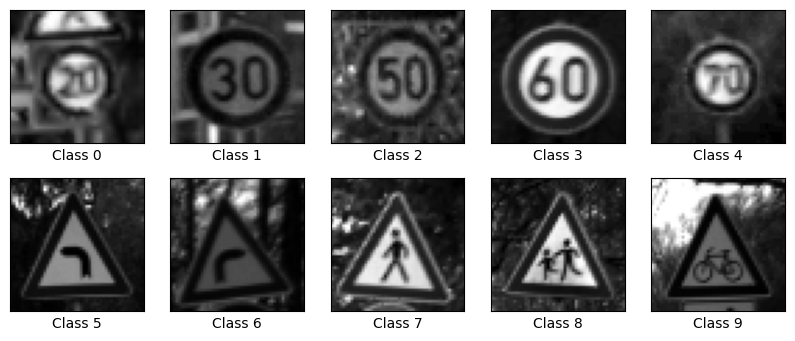

In [45]:
img_toshow = [0,210,2435,6085,7030,8275,8635,8875,9415,9685]

plt.figure(figsize=(10,4))

for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48), cmap='gray')
    plt.xlabel("Class "+str(complete_y_train.iloc[img_toshow[i]].to_numpy()[0]))

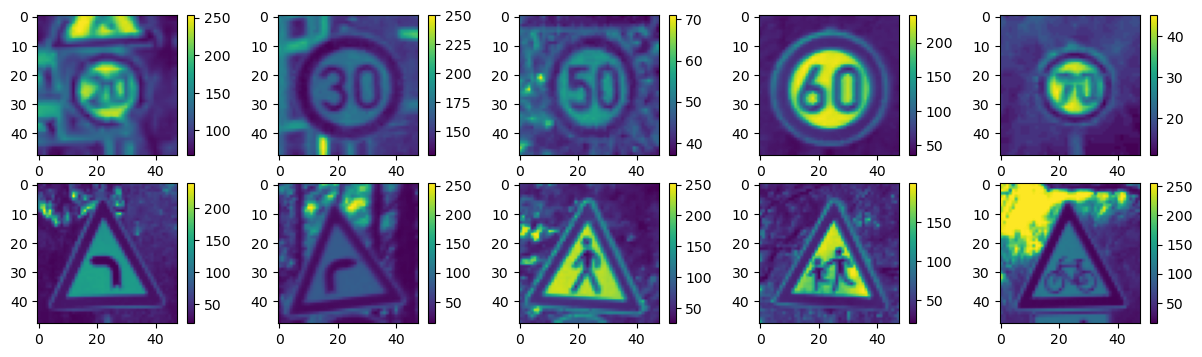

In [46]:
plt.figure(figsize=(15,4))
for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48))
    plt.colorbar()
    plt.grid(False)

In [47]:
complete_y_train["0"]

0       0
1       0
2       0
3       0
4       0
       ..
9685    9
9686    9
9687    9
9688    9
9689    9
Name: 0, Length: 9690, dtype: int64

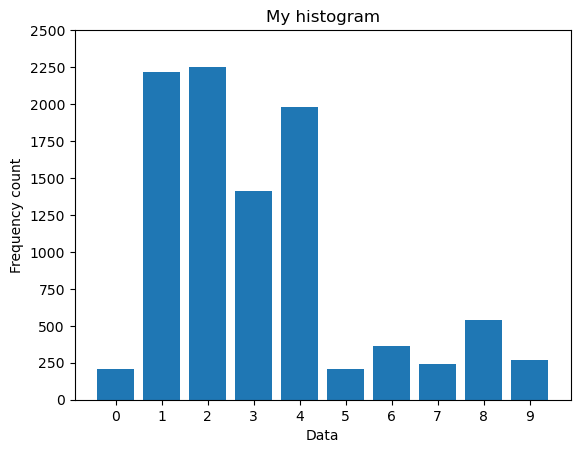

In [48]:
plt.bar(range(10),height=complete_y_train.groupby('0').value_counts().to_numpy())
plt.ylabel('Frequency count')
plt.xlabel('Data')
plt.xticks(range(10))
plt.yticks([0,250,500,750,1000,1250,1500,1750,2000,2250,2500])
plt.title('My histogram')
plt.show()

Data Preperation

Normalising the pixel values

In [49]:
complete_x_train = complete_x_train.copy().astype('float') / 255
complete_x_test = complete_x_test.copy().astype('float') / 255

Removing the noise from the data

In [50]:
def img_denoiser(arr): 
    pixel_array = arr
    reshaped_array = pixel_array.reshape((48, 48)) 
    normalized_array = np.uint8(reshaped_array * 255)
    if normalized_array.ndim != 2:
        raise ValueError("The image should have 2 dimensions") 
    thresholded_image = cv2.adaptiveThreshold(normalized_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresholded_image

In [51]:
complete_x_train_denoise = np.apply_along_axis(
    func1d=lambda img: img_denoiser(img),
    axis=1, arr=complete_x_train.copy()).reshape(-1, 48*48)

complete_x_test_denoise = np.apply_along_axis(
    func1d=lambda img: img_denoiser(img),
    axis=1, arr=complete_x_test.copy()).reshape(-1, 48*48)

In [52]:
complete_x_train_denoise = pd.DataFrame(complete_x_train_denoise.astype('float') / 255)
complete_x_test_denoise = pd.DataFrame(complete_x_test_denoise.astype('float') / 255)

Comparing the normal and denoised image

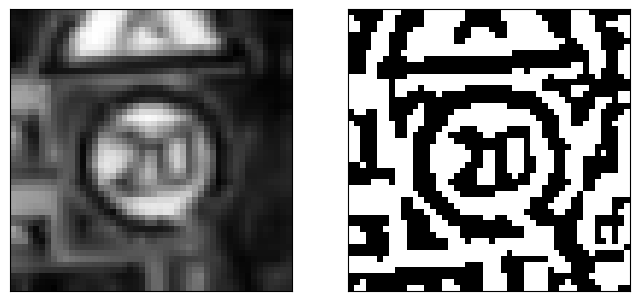

In [53]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(complete_x_train.iloc[0].to_numpy().reshape(48,48),'gray')
plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(complete_x_train_denoise.iloc[0].to_numpy().reshape(48,48),'gray')

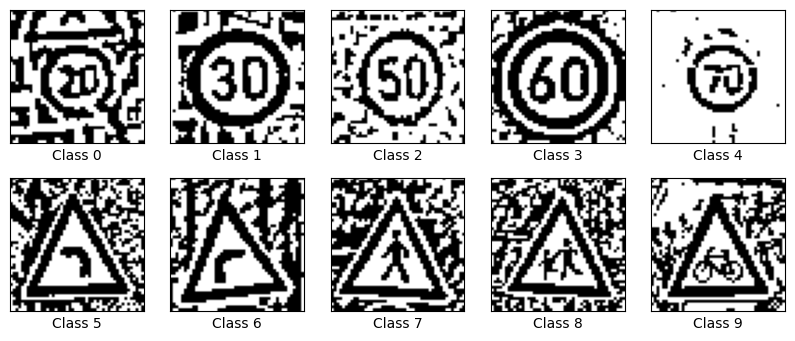

In [54]:
plt.figure(figsize=(10,4))

for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(complete_x_train_denoise.iloc[img_toshow[i]].to_numpy().reshape(48,48), cmap='gray')
    plt.xlabel("Class "+str(complete_y_train.iloc[img_toshow[i]].to_numpy()[0]))

Data Preperation for Naive Bayes Classifier

In [55]:
joined_dataset = complete_x_train_denoise.copy()
joined_dataset['class']=complete_y_train.copy()

Balancing out dataset using upper and lower stratification

In [56]:
grouped_dataset = joined_dataset.groupby('class', group_keys=False)
avg_val = int(grouped_dataset['class'].value_counts().mean())

In [57]:
balanced_dataset = pd.DataFrame()

for i in range(0,10):
    if (len(joined_dataset[joined_dataset['class']==i])<=avg_val):
        balanced_dataset = pd.concat([balanced_dataset, joined_dataset[joined_dataset['class']==i].sample(avg_val, replace=True)])
    else:
        balanced_dataset = pd.concat([balanced_dataset, joined_dataset[joined_dataset['class']==i].sample(avg_val)])

balanced_dataset_x = balanced_dataset.iloc[:,:2304]
balanced_dataset_y = balanced_dataset.iloc[:,2304:]

In [58]:
complete_y_train.groupby('0').value_counts()

0
0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
dtype: int64

In [59]:
balanced_dataset_y.groupby('class').value_counts()

class
0    969
1    969
2    969
3    969
4    969
5    969
6    969
7    969
8    969
9    969
dtype: int64

Removing Outliers

In [60]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.2)
    Q3 = df.quantile(0.8)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return trueList

In [61]:
no_outlier_train = Remove_Outlier_Indices(balanced_dataset_x.copy())
no_outlier_test = Remove_Outlier_Indices(complete_x_test_denoise.copy())

In [62]:
no_outlier_dataset_train = balanced_dataset_x[no_outlier_train]
no_outlier_dataset_test = complete_x_test_denoise[no_outlier_test]

no_outlier_dataset_train = no_outlier_dataset_train.fillna(0)
no_outlier_dataset_test = no_outlier_dataset_test.fillna(0)

**Running Naive Bayes on balanced dataset**

Functions for Naive Bayes

****Coursework 2****

Clustering

In [63]:
def process_image(image_path):
    # Read the image in grayscale
    pixel_array = image_path
    reshaped_array = pixel_array.reshape((48, 48))
    normalized_array = np.uint8(reshaped_array*255)
 
    # Convert the image to binary using Otsu's method
    _, binary_image = cv2.threshold(normalized_array, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
 
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
 
    # Compute the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
 
    # Crop the number from the image
    number = normalized_array[y:y+h, x:x+w]
 
    return [number,h, w]

In [64]:
import numpy as np
import cv2

# Assume X is a 2D numpy array of shape (9690, num_pixels_per_image)
# where each row is a flattened grayscale image

# Determine the dimensions of the images
image_height = 48
image_width = 48
X= no_outlier_dataset_train

equalized_images = np.zeros((X.shape[0], image_height * image_width), dtype=np.uint8)

for i in range(X.shape[0]):
    # Convert the row to a numpy array and reshape it to a 2D image
    image = X.iloc[i].values.reshape((image_height, image_width)).astype(np.uint8)  # Convert to uint8 type
    
    # Apply histogram equalization
    image_eq = cv2.equalizeHist(image)
    
    # Flatten the image back to 1D and store it
    equalized_images[i, :] = image_eq.flatten()

# 'equalized_images' now contains the histogram-equalized images




In [65]:
def contrast(arr):
    image_height = 48
    image_width = 48
    X= arr
    
    equalized_images = np.zeros((X.shape[0], image_height * image_width), dtype=np.uint8)
    
    for i in range(X.shape[0]):
        # Convert the row to a numpy array and reshape it to a 2D image
        image = X.reshape((image_height, image_width)).astype(np.uint8)  # Convert to uint8 type
    
        # Apply histogram equalization
        image_eq = cv2.equalizeHist(image)
    
        # Flatten the image back to 1D and store it
        equalized_images[i, :] = image_eq.flatten()

In [66]:
def process_image(image_path):
    # Read the image in grayscale
    pixel_array = image_path
    reshaped_array = pixel_array.reshape((48, 48)) 
    normalized_array = np.uint8(reshaped_array*255)

    image_eq = cv2.equalizeHist(normalized_array)

    # Convert the image to binary using Otsu's method
    _, binary_image = cv2.threshold(image_eq, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Compute the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the number from the image
    number = normalized_array[y:y+h, x:x+w]

    return [number,h, w]

In [67]:
def img_denoiser(arr): 
    pixel_array = arr
    reshaped_array = pixel_array.reshape((48, 48)) 
    normalized_array = np.uint8(reshaped_array*255)
    if normalized_array.ndim != 2:
        raise ValueError("The image should have 2 dimensions")
    
    # thresholded_image = cv2.resize(normalized_array,dim)
    thresholded_image = cv2.adaptiveThreshold(normalized_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY_INV, 11, 1)
    return thresholded_image

In [68]:
def simplify(arr):
    im = process_image(np.array(arr))
    ret = img_denoiser(cv2.resize(im[0].reshape(im[1],im[2]),(48,48)))
    return ret

In [69]:
dim=(48,48)

In [78]:
complete_x_train_denoise = np.apply_along_axis(
    func1d=lambda img: simplify(img),
    axis=1, arr=complete_x_train.copy()).reshape(-1, dim[0]*dim[1])

complete_x_test_denoise = np.apply_along_axis(
    func1d=lambda img: simplify(img),
    axis=1, arr=complete_x_test.copy()).reshape(-1, dim[0]*dim[1])

complete_x_train_denoise = pd.DataFrame(complete_x_train_denoise)
complete_x_test_denoise = pd.DataFrame(complete_x_test_denoise)

In [79]:
joined_dataset = complete_x_train_denoise.copy()
joined_dataset['class']=complete_y_train.copy()

grouped_dataset = joined_dataset.groupby('class', group_keys=False)
avg_val = int(grouped_dataset['class'].value_counts().max())

balanced_dataset = pd.DataFrame()

for i in range(0,10):
        balanced_dataset = pd.concat([balanced_dataset, joined_dataset[joined_dataset['class']==i].sample(avg_val, replace=True)])

balanced_dataset_x = balanced_dataset.iloc[:,:dim[0]*dim[1]]
balanced_dataset_y = balanced_dataset.iloc[:,dim[0]*dim[1]:]

In [80]:
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Assuming 'X' is your dataset where each row is a flattened image
X = balanced_dataset_x.to_numpy()  # Convert DataFrame to NumPy array if not already

# Define the dimensions of your images
image_height = 48  # Replace with actual image height
image_width = 48   # Replace with actual image width

# Function to compute HOG features for each image
def compute_hog_features(dataset, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9):
    n_images = dataset.shape[0]
    # Determine the feature length once to initialize the feature matrix
    sample_feature_length = len(hog(dataset[0].reshape((image_height, image_width)),
                                    pixels_per_cell=pixels_per_cell,
                                    cells_per_block=cells_per_block,
                                    orientations=orientations,
                                    visualize=False))
    # Initialize the HOG feature matrix
    hog_features = np.zeros((n_images, sample_feature_length))
    
    # Compute HOG features for each image
    for i in range(n_images):
        image = dataset[i].reshape((image_height, image_width))
        hog_feature, _ = hog(image,
                             pixels_per_cell=pixels_per_cell,
                             cells_per_block=cells_per_block,
                             orientations=orientations,
                             visualize=True)
        hog_features[i] = hog_feature
        
    return hog_features

# Compute HOG features for the entire dataset
balanced_dataset_x = compute_hog_features(X)

# Now 'hog_features' is an array where each row contains the HOG features for the corresponding image


KeyboardInterrupt: 

In [81]:
def process_image(image_path):
    # Read the image in grayscale
    pixel_array = image_path
    reshaped_array = pixel_array.reshape((48, 48)) 
    normalized_array = np.uint8(reshaped_array*255)

    image_eq = cv2.equalizeHist(normalized_array)

    # Convert the image to binary using Otsu's method
    _, binary_image = cv2.threshold(image_eq, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Compute the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the number from the image
    number = normalized_array[y:y+h, x:x+w]

    return [number,h, w]

In [82]:
import numpy as np

def initialize_centroids(data, k):
    """ Randomly selects k data points as initial centroids """
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """ Assigns each data point to the closest centroid """
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(data, assignments, k):
    """ Recalculates centroids as mean of assigned data points """
    new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(data, k, max_iters=200, tol=1e-4):
    """ K-means algorithm using an EM-like approach """
    centroids = initialize_centroids(data, k)
    old_centroids = None
    iterations = 0

    while not should_stop(old_centroids, centroids, iterations, max_iters, tol):
        old_centroids = centroids
        assignments = assign_clusters(data, centroids)
        centroids = update_centroids(data, assignments, k)
        iterations += 1

    return centroids, assignments

def should_stop(old_centroids, centroids, iterations, max_iters, tol):
    """ Convergence check """
    if iterations > max_iters:
        return True
    if old_centroids is not None:
        shift = np.linalg.norm(centroids - old_centroids, axis=1).sum()
        return shift < tol
    return False

# Example usage:
# Let's say you have a dataset 'X' that you want to cluster.



In [83]:
k = 10  # Number of clusters

final_centroids, final_assignments = k_means(complete_x_train_denoise.to_numpy(), k)

print("Final centroids:\n", final_centroids)
print("Cluster assignments:\n", final_assignments)

Final centroids:
 [[ 86.25503356  86.59731544  92.0738255  ...  88.65100671  90.02013423
   87.62416107]
 [ 97.77972028  95.9965035  100.75174825 ...  83.21678322  71.32867133
   80.54195804]
 [ 82.12096774  84.4516129   84.72580645 ...  71.83870968  90.20967742
   97.61290323]
 ...
 [ 94.11340206  80.96907216  72.55670103 ...  72.55670103  66.77319588
   73.08247423]
 [112.42586002 111.01423488 109.19928826 ...  97.60379597  95.78884935
   97.2004745 ]
 [ 80.71100917  84.80504587  85.97477064 ...  90.65366972  78.95642202
   78.95642202]]
Cluster assignments:
 [8 8 1 ... 8 8 8]


ValueError: 'c' argument has 9690 elements, which is inconsistent with 'x' and 'y' with size 22500.

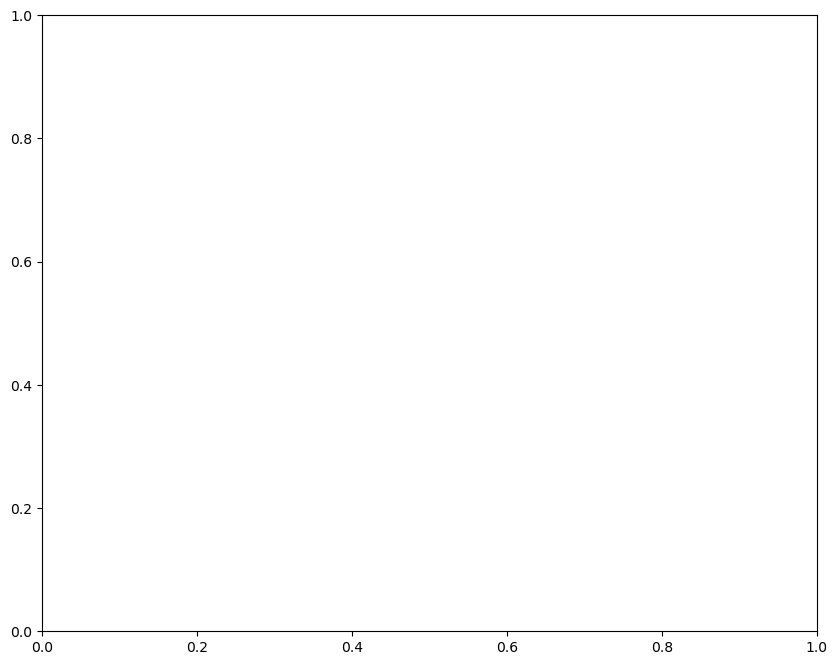

In [84]:
X=balanced_dataset_x
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'X' is your dataset and 'final_centroids' and 'final_assignments' are outputs from your k_means function

# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(final_centroids)

# Scatter plot of the data points
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_assignments, cmap='viridis', marker='o', alpha=0.5, label='Data Points')

# Scatter plot of the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=100, label='Centroids')

# Setting the plot title and labels
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding a legend to indicate which symbols represent the data points and which represent the centroids
plt.legend()

# Show the plot
plt.show()


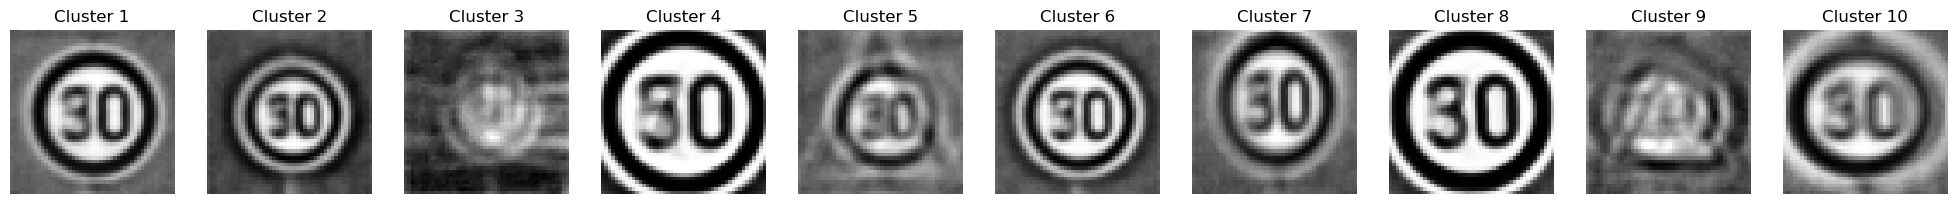

In [85]:
import matplotlib.pyplot as plt

# Let's say each image is 28x28 pixels
image_height = 48
image_width = 48

# Number of clusters
k = 10

# Reshape centroids and plot them as images
fig, axes = plt.subplots(1, k, figsize=(25,18))
for i, centroid in enumerate(final_centroids):
    # Reshape the centroid into the original image dimensions
    image = centroid.reshape(image_height, image_width)
    
    # Display the image
    ax = axes[i]
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Cluster {i+1}')

plt.show()


In [86]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm


# Assume 'X' is your feature matrix and 'final_assignments' are the labels from the clustering
# Ensure that 'X' is not the PCA-transformed dataset but the original feature set that was used for clustering

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, final_assignments)

# Calculate the silhouette score average
silhouette_avg = silhouette_score(no_outlier_dataset_train, final_assignments)
print(f"Average silhouette score: {silhouette_avg}")

# Number of clusters
n_clusters = len(np.unique(final_assignments))

# Create a subplot with 1 row and 1 column
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The silhouette plot ranges from -1 to 1
ax1.set_xlim([-1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = silhouette_vals[final_assignments == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-1, -0.5, 0, 0.5, 1])

plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
             fontsize=14, fontweight='bold')

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [22500, 9690]

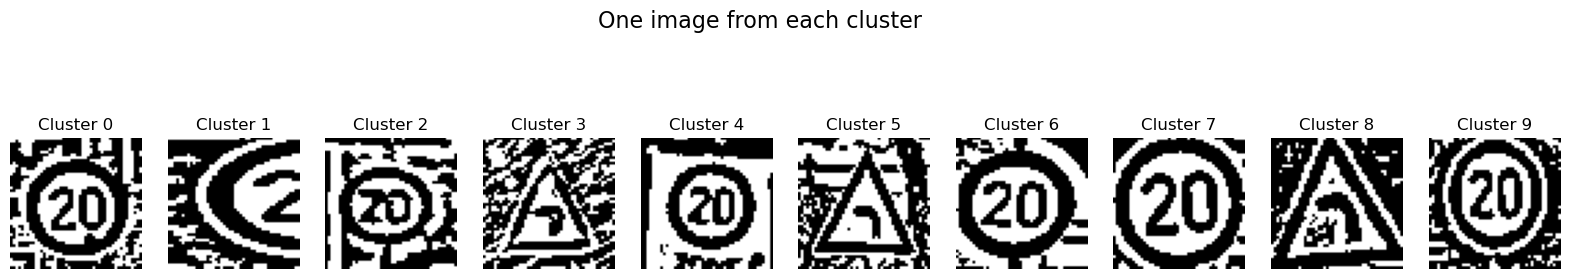

In [87]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X' is a pandas DataFrame and each row is a flattened grayscale image
X =balanced_dataset_x.to_numpy()  # Convert DataFrame to NumPy array if not already
n_clusters = 10  # The number of clusters to find
image_height = 48  # The height of the images (you should define this)
image_width = 48   # The width of the images (you should define this)

# Initialize and fit Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(X)

# Get unique cluster labels
unique_labels = np.unique(agg_labels)

# Reshape the dataset into the original image dimensions
images_2d = X.reshape((-1, image_height, image_width))

# Create a dictionary to hold the indices of images in each cluster
cluster_indices = {}
for label in unique_labels:
    cluster_indices[label] = np.where(agg_labels == label)[0]

# Plot one image from each cluster
fig, axs = plt.subplots(1, n_clusters, figsize=(20, 4))
fig.suptitle('One image from each cluster', fontsize=16)

for i, (label, indices) in enumerate(cluster_indices.items()):
    # Select the first image index from the cluster for display
    image_idx = indices[0]
    axs[i].imshow(images_2d[image_idx], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Cluster {label}')

plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Assume 'X' is your dataset
X = balanced_dataset_x.to_numpy()  # Convert DataFrame to NumPy array if necessary

# Initialize Gaussian Mixture Model
# n_components is the number of clusters (Gaussian distributions) to fit
gmm = GaussianMixture(n_components=10, random_state=42)

# Fit the model and predict clusters (soft clustering)
gmm.fit(X)
cluster_assignments = gmm.predict(X)

# For soft clustering (probabilities), you can use predict_proba
cluster_probs = gmm.predict_proba(X)

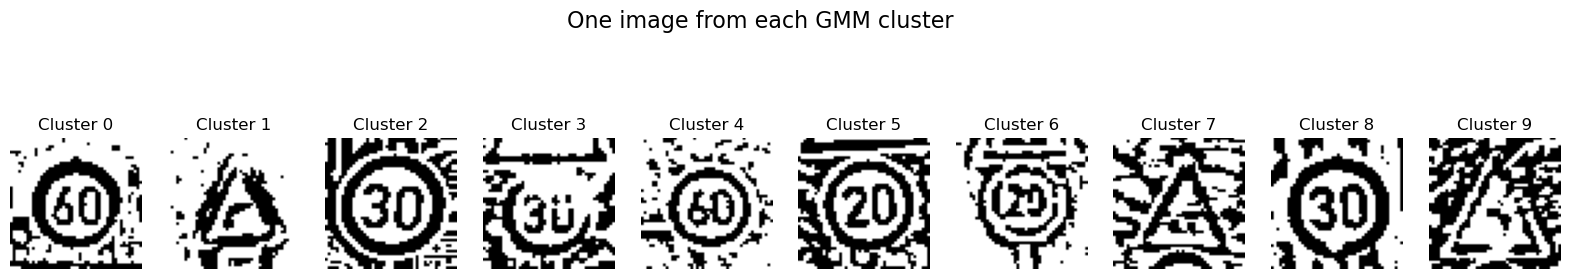

In [ ]:
import matplotlib.pyplot as plt

# Assuming you know the height and width of the images
image_height = 48  # Replace with actual image height
image_width = 48   # Replace with actual image width
X= balanced_dataset_x.to_numpy()
# Reshape the dataset into the original image dimensions
images_2d = X.reshape((-1, image_height, image_width))

# Find the indices of images for each cluster
cluster_indices = {}
for cluster in range(gmm.n_components):
    cluster_indices[cluster] = np.where(cluster_assignments == cluster)[0]

# Plot one image from each cluster
fig, axs = plt.subplots(1, gmm.n_components, figsize=(20, 4))
fig.suptitle('One image from each GMM cluster', fontsize=16)

for i, indices in cluster_indices.items():
    if len(indices) > 0:  # If there are images in the cluster
        # Choose a random image index from this cluster
        image_idx = np.random.choice(indices)
        axs[i].imshow(images_2d[image_idx], cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f'Cluster {i}')
plt.show()


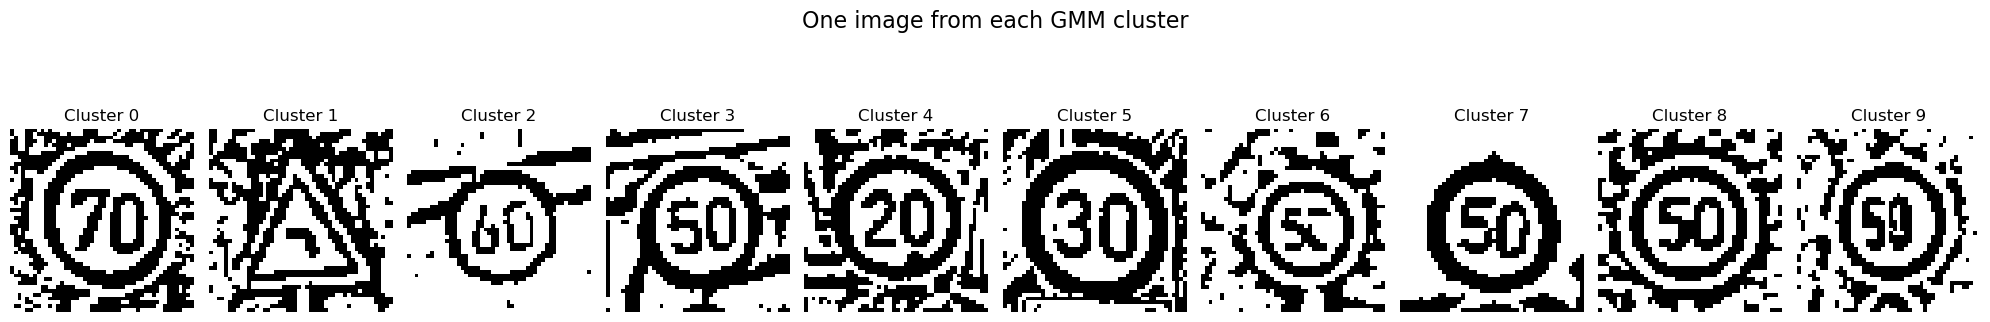

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Assume 'X' is your dataset where each row is a flattened grayscale image
X = balanced_dataset_x.to_numpy()  # Convert DataFrame to NumPy array if not already
image_height = 48  # Replace with actual image height
image_width = 48   # Replace with actual image width

# Initialize and fit GMM (which uses the EM algorithm)
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(X)
cluster_assignments = gmm.predict(X)

# Reshape flat images into 2D arrays for visualization
images_2d = X.reshape((-1, image_height, image_width))

# Plot one image from each cluster
fig, axs = plt.subplots(1, gmm.n_components, figsize=(20, 4))
fig.suptitle('One image from each GMM cluster', fontsize=16)

# Find and plot a representative image from each cluster
for i in range(gmm.n_components):
    # Get indices of all images in this cluster
    indices = np.where(cluster_assignments == i)[0]
    
    # If there are images in the cluster, display one of them
    if len(indices) > 0:
        # Randomly choose an image index from this cluster
        image_idx = np.random.choice(indices)
        axs[i].imshow(images_2d[image_idx], cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()
